## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Data Understanding
The data we are using comes from the King County housing data set.

In order to better understand data represented in the columns we accessed the King County Assessor website at: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## Setting up standard imports
The cell below imports standard libraries that will be used for both data exploration, cleaning, and modeling. 

In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Exploratory Data Analysis

Open csv file.

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

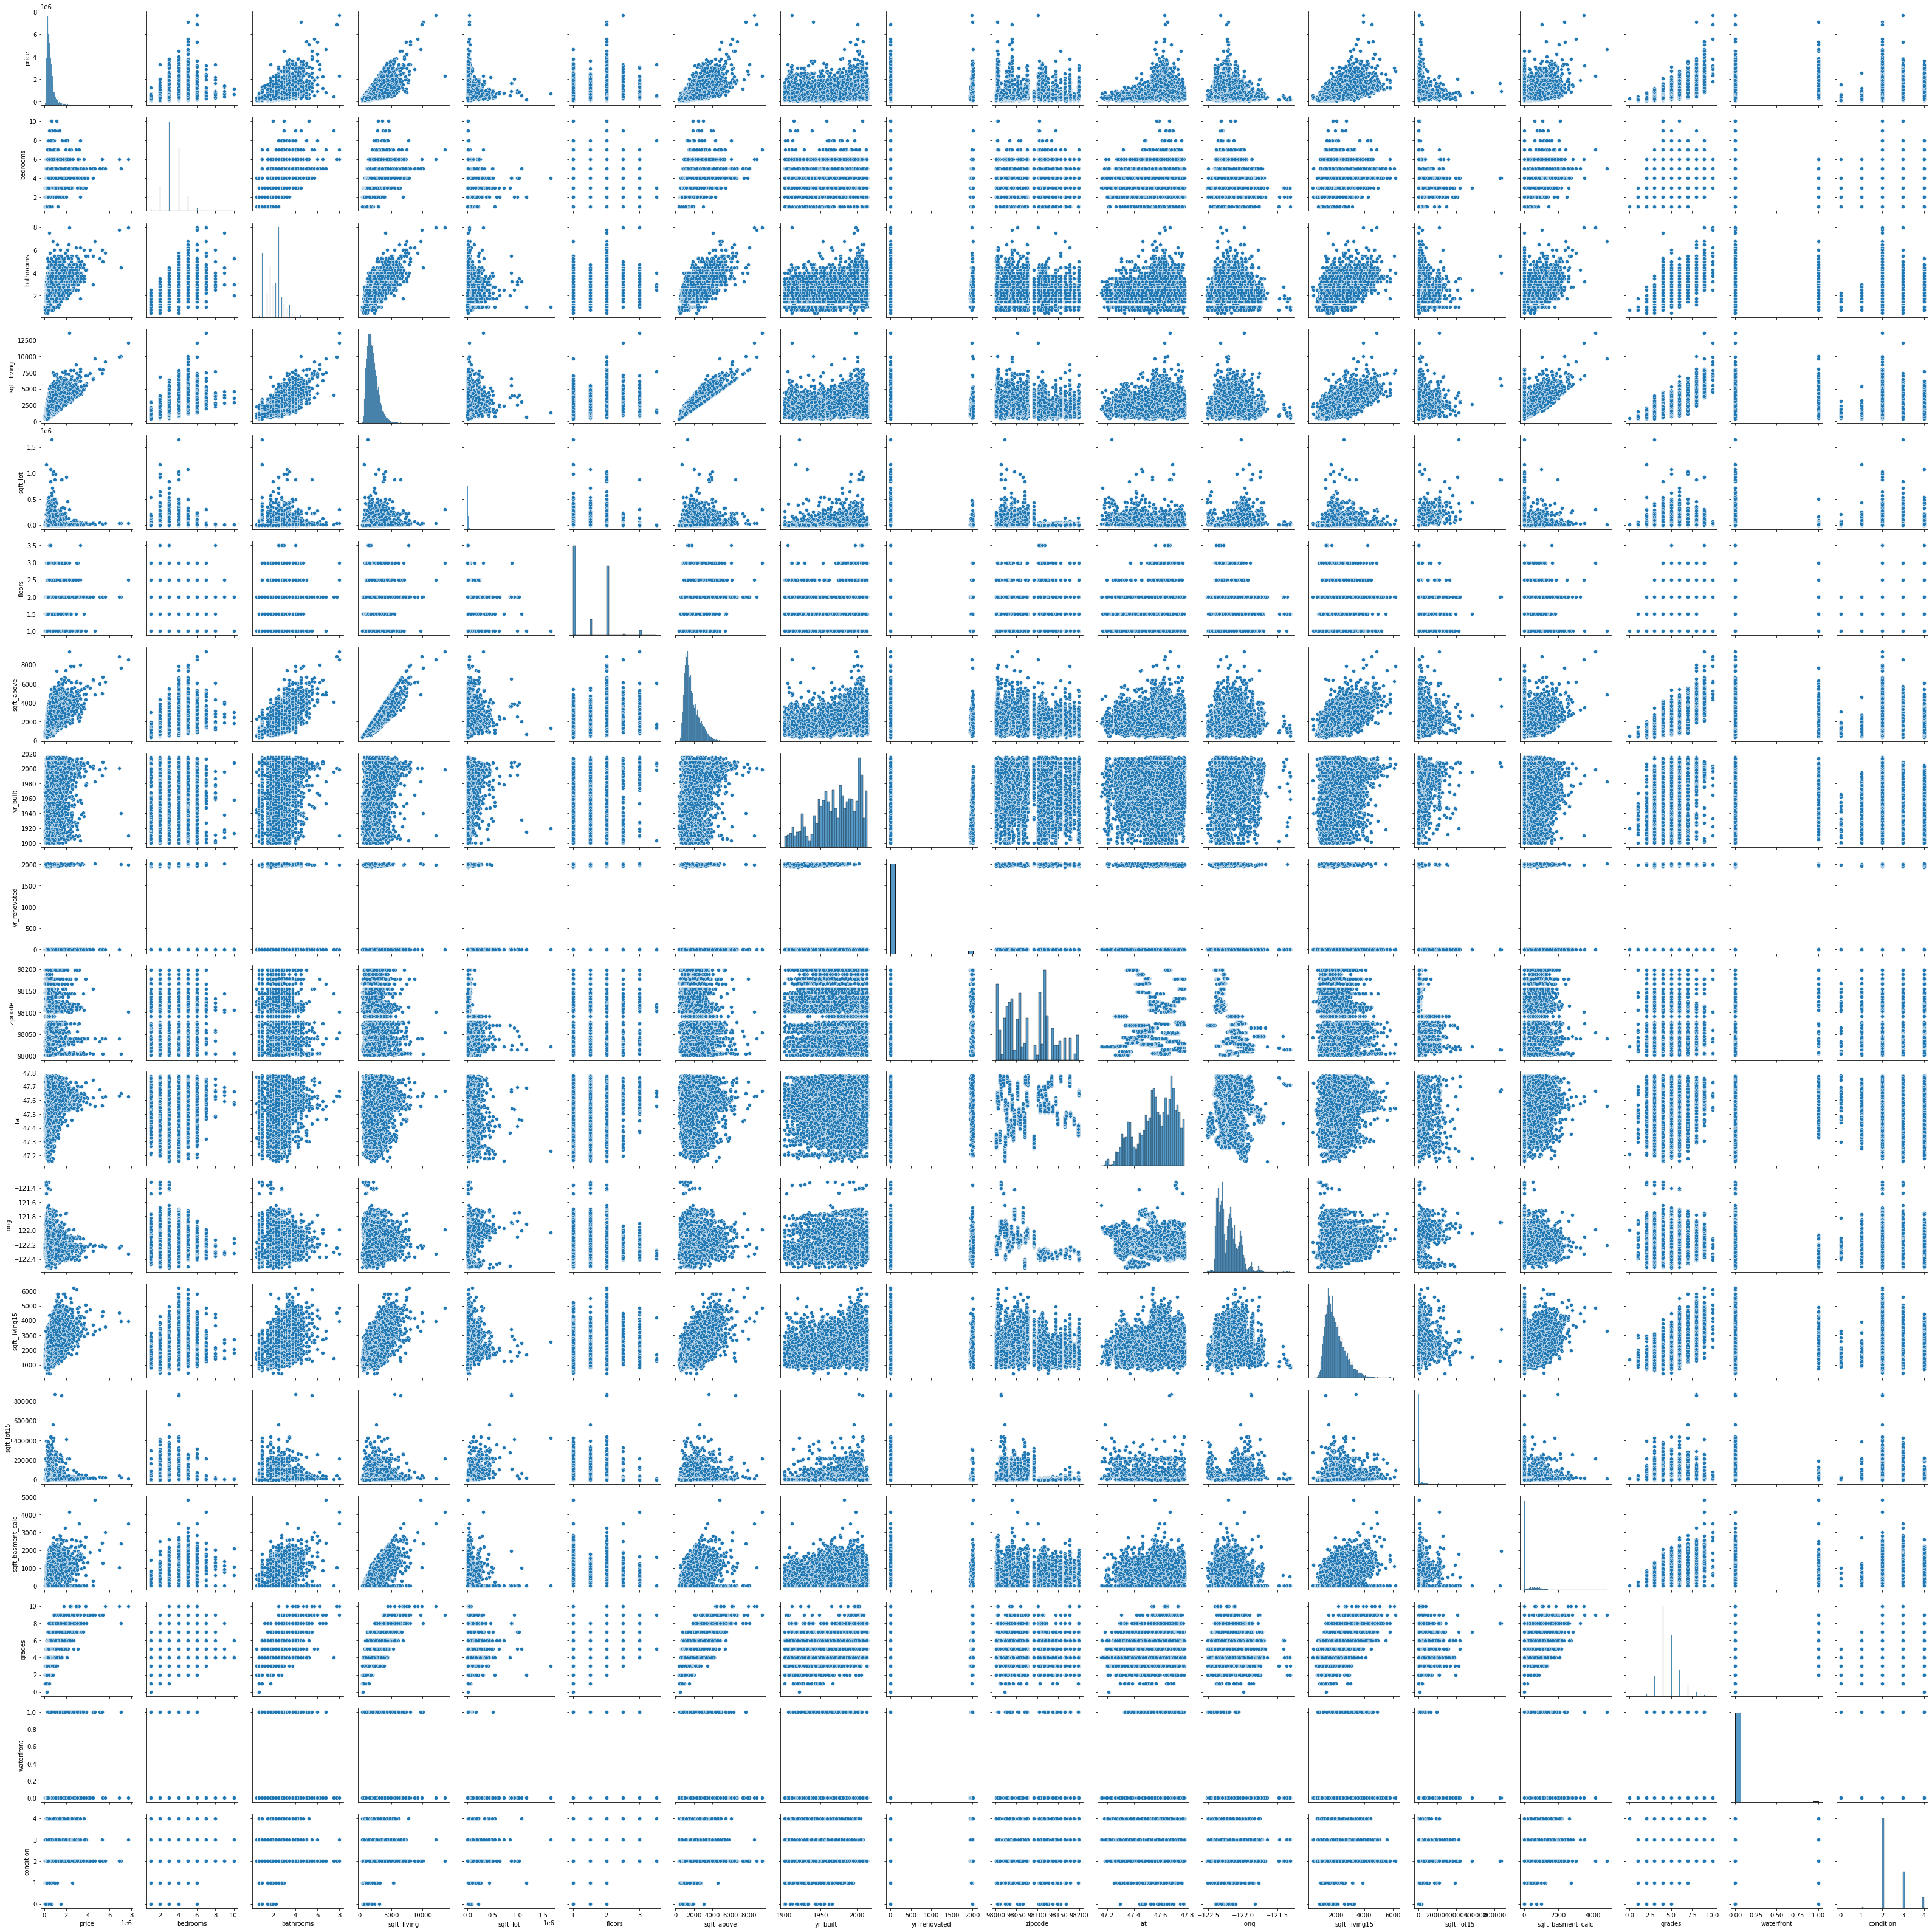

In [3]:
sns.pairplot(df)

Create correlation table. Beginning to look for related features for simple linear regression.

In [4]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,1.000000,0.316504,0.525934,0.701948,0.089879,0.256828,0.605401,0.053964,0.117948,-0.053408,0.306687,0.022045,0.585274,0.082848,0.323800,0.667967,0.264308,0.036029
bedrooms,0.316504,1.000000,0.528308,0.593780,0.033753,0.183648,0.493074,0.161719,0.016592,-0.159056,-0.011602,0.137205,0.405530,0.032057,0.309503,0.367001,-0.002026,0.023726
bathrooms,0.525934,0.528308,1.000000,0.755742,0.088384,0.502550,0.686655,0.507315,0.046923,-0.204814,0.024303,0.224958,0.569948,0.088315,0.283433,0.665889,0.063634,-0.126415
sqft_living,0.701948,0.593780,0.755742,1.000000,0.173465,0.353913,0.876446,0.318255,0.050844,-0.199823,0.052181,0.241261,0.756468,0.184355,0.435134,0.762825,0.104642,-0.059369
sqft_lot,0.089879,0.033753,0.088384,0.173465,1.000000,-0.004813,0.184145,0.052922,0.005041,-0.129577,-0.085507,0.230216,0.144749,0.718202,0.015432,0.114721,0.021457,-0.008813
floors,0.256828,0.183648,0.502550,0.353913,-0.004813,1.000000,0.523956,0.489300,0.003558,-0.059547,0.049282,0.125964,0.280118,-0.010722,-0.245732,0.458820,0.020798,-0.263994
sqft_above,0.605401,0.493074,0.686655,0.876446,0.184145,0.523956,1.000000,0.424116,0.020469,-0.261580,-0.001159,0.344869,0.731805,0.195082,-0.052155,0.756103,0.071779,-0.158808
yr_built,0.053964,0.161719,0.507315,0.318255,0.052922,0.489300,0.424116,1.000000,-0.202269,-0.347184,-0.148354,0.409927,0.326313,0.070749,-0.132996,0.447844,-0.024500,-0.361638
yr_renovated,0.117948,0.016592,0.046923,0.050844,0.005041,0.003558,0.020469,-0.202269,1.000000,0.062314,0.028004,-0.064335,0.000879,0.004356,0.067176,0.015766,0.074007,-0.055677
zipcode,-0.053408,-0.159056,-0.204814,-0.199823,-0.129577,-0.059547,-0.261580,-0.347184,0.062314,1.000000,0.266731,-0.564246,-0.279272,-0.147283,0.074696,-0.185750,0.028927,0.002851


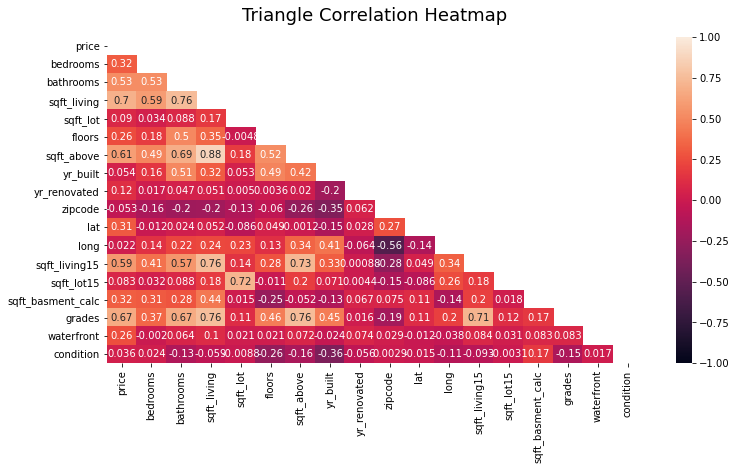

In [5]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot = True);
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

From the heat map it appears that sqft_living seems to have the highest correlation to price. It is also moderately and highly correlated to number bedrooms and bathrooms which could cause issues with multicollinearity. 

## Baseline Linear Regression 
### Price & Square Foot Living 

In [6]:
y = df['price']
x = df['sqft_living']

In [7]:
price_living_results = sm.OLS(y, sm.add_constant(x)).fit()

In [8]:
price_living_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:45:21   Log-Likelihood:            -3.0003e+05
No. Observations:               21595   AIC:                         6.001e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.403e+04   4410.136     -9.983      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8829      1.939    144.824      0.000     277.081     284.684
==============================================================================
Omnibus:                    14800.070   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542549.404
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.899   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model only explains 49% of variance for sale price of a house. Square feet of living space is a significant feature with a p-value of < 0.05. For every additional livable squarefoot you could expect to see an increase of 280 dollars in sale price. 

As stated before there seem to be some issues with multicollinearity based on the very high Cond. No.

### Exploring Categorical Data

Created histograms to explore categorical data types: waterfront, condition, & grade. 

In [9]:
df.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
sqft_above             int64
yr_built               int64
yr_renovated         float64
zipcode                int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
sqft_basment_calc      int64
grades               float64
waterfront           float64
condition            float64
dtype: object

In [10]:
df['waterfront'].value_counts()
#0:No, 1:Yes

0.0    21449
1.0      146
Name: waterfront, dtype: int64

In [11]:
waterfront_prices = df.groupby("waterfront")["price"].mean()

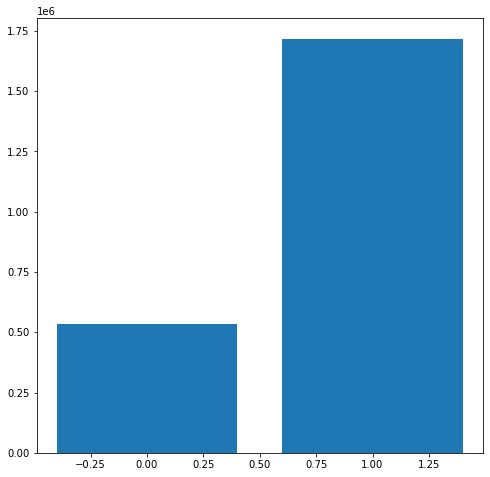

In [12]:
#average price per 'waterfront' value (no, unknown, yes)
fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(x = waterfront_prices.index, height = waterfront_prices);

In [13]:
df['condition'].value_counts()
#0:worst condition, 4:best condition

2.0    14019
3.0     5677
4.0     1700
1.0      170
0.0       29
Name: condition, dtype: int64

In [14]:
condition_prices = df.groupby("condition")["price"].mean()

In [15]:
df['condition'].value_counts()

2.0    14019
3.0     5677
4.0     1700
1.0      170
0.0       29
Name: condition, dtype: int64

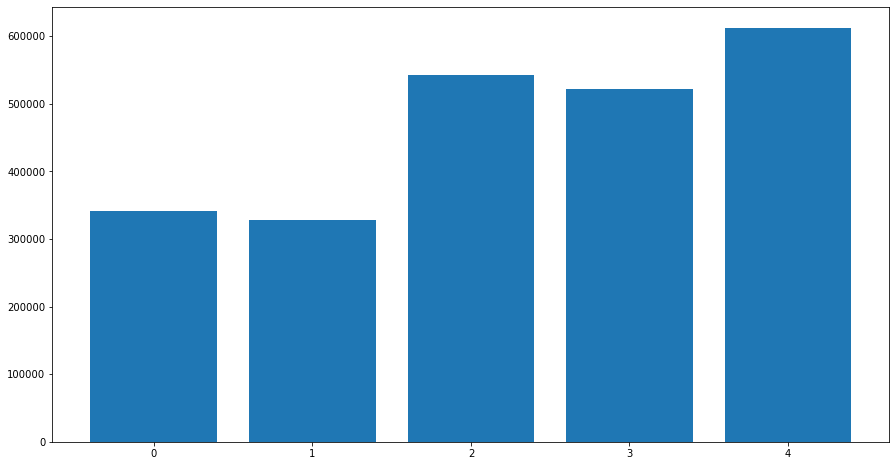

In [16]:
#average price per 'condtion' value (poor, fair, average, good, very good)
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x = condition_prices.index, height = condition_prices);

In [17]:
df['grades'].value_counts()
#0:lowest grade, 10:highest grade

4.0     8972
5.0     6065
6.0     2615
3.0     2038
7.0     1134
8.0      399
2.0      242
9.0       89
1.0       27
10.0      13
0.0        1
Name: grades, dtype: int64

In [18]:
grade_prices = df.groupby("grades")["price"].mean()

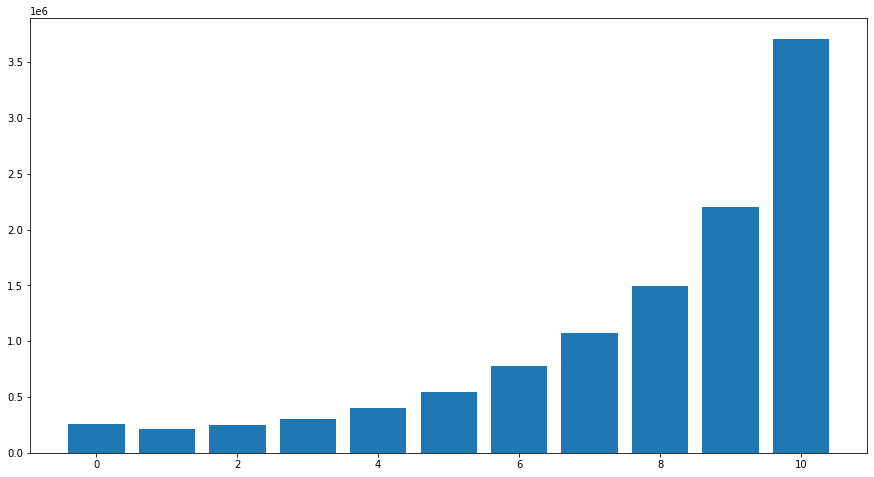

In [19]:
#average price per 'grade' value ('3 Poor'-'13 Mansion' originally)
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = grade_prices.index, height = grade_prices);

- A house on the waterfront sells for more than 3x what a house not on the waterfront or unknown does. unknown is also behaving a lot like 'no'
- As condition improves, house price generally improves, though the poor->fair, and average-> actually see decreases
- Price and grade have a strong relationship, with price increasing by a greater magnitude with each grade that increases (relationship is less strong at lower grades)



In [20]:
y = df['price']
X = df.loc[:, ['sqft_living', 'grades']]


In [21]:
results_grade = sm.OLS(y, sm.add_constant(X)).fit()

In [22]:
results_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:45:22   Log-Likelihood:            -2.9910e+05
No. Observations:               21595   AIC:                         5.982e+05
Df Residuals:                   21592   BIC:                         5.982e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.05e+05   7266.316    -41.980      0.000   -3.19e+05   -2.91e+05
sqft_living   184.1451      2.873     64.102      0.000     178.514     189.776
grades       9.924e+04   2248.046     44.145      0.000    9.48e+04    1.04e+05
==============================================================================
Omnibus:                    16958.903   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005547.569
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.770   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model exploring condition and sale price can account for 53.5 of variance in price. (this is about a 4% increase from just square feet living model.

By this model, each square foot adds about \\$184 to sale price. As grade increases, sale price goes up about $10k per grade.


## Multiple Linear Regression

### Exploring Multicollinearity

In [23]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [24]:
df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))

df_multico.set_index(['pairs'], inplace = True)

df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']

df_multico.drop_duplicates(inplace=True)

df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876446
"(sqft_living, grades)",0.762825
"(sqft_living15, sqft_living)",0.756468
"(sqft_above, grades)",0.756103
"(sqft_living, bathrooms)",0.755742


These columns are all highly correlated with one another and could potentially be dropped from future models. 